In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

%store -r

In [2]:
df = pd.DataFrame(response.json()['Time Series (Daily)'].values())

In [3]:
df

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,134.4900,134.8300,132.7500,133.3491,133.3491,3888879,0.0000,1.0000
1,132.6900,136.1300,132.6900,135.8900,135.8900,9032548,0.0000,1.0000
2,134.8100,135.5400,133.6900,134.2300,134.2300,9324279,0.0000,1.0000
3,132.8400,134.9700,132.4784,134.4300,134.4300,13060214,0.0000,1.0000
4,130.2700,132.9400,129.7100,132.0300,132.0300,12854512,0.0000,1.0000
...,...,...,...,...,...,...,...,...
5028,82.5000,83.3100,81.5600,81.7500,29.4413,3410067,0.0000,1.0000
5029,83.5000,84.8700,80.2500,83.1900,29.9599,6133467,0.0000,1.0000
5030,83.0000,84.1900,81.3800,82.3800,29.6682,4750800,0.0000,1.0000
5031,82.4400,84.5000,81.3100,83.7500,30.1615,6434000,0.0000,1.0000


In [4]:
response_keys = list(response.json()['Time Series (Daily)'].keys())

df.rename(columns = {df.columns[i]: ''.join(re.search(r'(\d+\.\s)(.*)', 
    df.columns[i]).group(2)) for i in range(len(df.columns)) 
        if (re.search(r'(\d+\.\s)(.*)', df.columns[i])) is not None},
    index = {range(len(df))[i]: response_keys[i] for i in range(len(df))},
    inplace = True)

In [5]:
df

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2020-01-31,134.4900,134.8300,132.7500,133.3491,133.3491,3888879,0.0000,1.0000
2020-01-30,132.6900,136.1300,132.6900,135.8900,135.8900,9032548,0.0000,1.0000
2020-01-29,134.8100,135.5400,133.6900,134.2300,134.2300,9324279,0.0000,1.0000
2020-01-28,132.8400,134.9700,132.4784,134.4300,134.4300,13060214,0.0000,1.0000
2020-01-27,130.2700,132.9400,129.7100,132.0300,132.0300,12854512,0.0000,1.0000
...,...,...,...,...,...,...,...,...
2000-02-04,82.5000,83.3100,81.5600,81.7500,29.4413,3410067,0.0000,1.0000
2000-02-03,83.5000,84.8700,80.2500,83.1900,29.9599,6133467,0.0000,1.0000
2000-02-02,83.0000,84.1900,81.3800,82.3800,29.6682,4750800,0.0000,1.0000
2000-02-01,82.4400,84.5000,81.3100,83.7500,30.1615,6434000,0.0000,1.0000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5033 entries, 2020-01-31 to 2000-01-31
Data columns (total 8 columns):
open                 5033 non-null object
high                 5033 non-null object
low                  5033 non-null object
close                5033 non-null object
adjusted close       5033 non-null object
volume               5033 non-null object
dividend amount      5033 non-null object
split coefficient    5033 non-null object
dtypes: object(8)
memory usage: 353.9+ KB
None


In [7]:
print(df.dtypes)

open                 object
high                 object
low                  object
close                object
adjusted close       object
volume               object
dividend amount      object
split coefficient    object
dtype: object


In [8]:
df = df.astype('float')
print(df.dtypes)

open                 float64
high                 float64
low                  float64
close                float64
adjusted close       float64
volume               float64
dividend amount      float64
split coefficient    float64
dtype: object


In [9]:
df.describe()

#no extreme outliers to worry about

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03,5033.000000,5033.000000
mean,54.311775,54.884421,53.667471,54.283675,44.056051,2.113111e+07,0.006306,1.000099
std,25.496138,25.633082,25.408807,25.519420,27.851944,2.004327e+07,0.055453,0.007048
min,15.350000,15.450000,14.960000,15.450000,9.557000,1.347300e+06,0.000000,1.000000
25%,37.610000,38.030000,37.130000,37.600000,25.908500,9.644200e+06,0.000000,1.000000
50%,44.980000,45.480000,44.250000,44.940000,32.700300,1.403318e+07,0.000000,1.000000
75%,61.110000,61.630000,60.630000,61.140000,52.427800,2.536740e+07,0.000000,1.000000
max,139.900000,141.100000,139.265000,141.090000,140.178000,2.172942e+08,1.000000,1.500000


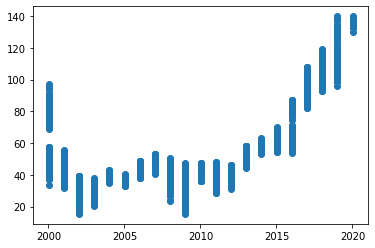

In [40]:
# daily opening prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.open.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

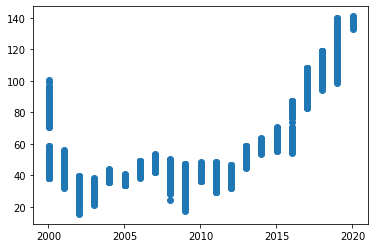

In [41]:
# daily high prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.high.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

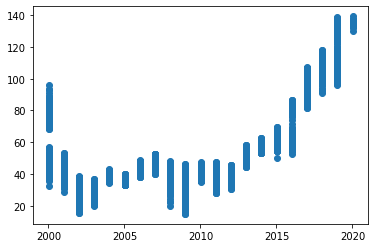

In [42]:
# daily low prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.low.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

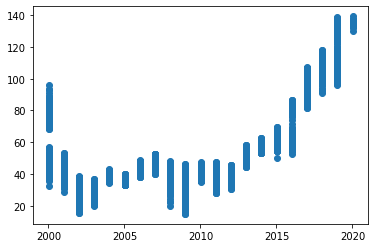

In [43]:
# daily closing prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.low.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

In [ ]:
# as we can see, all the price factors have similar shapes over time

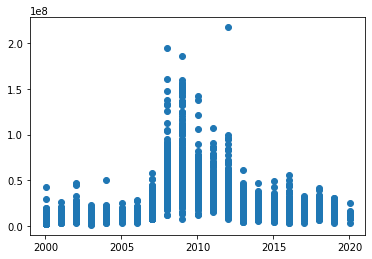

In [45]:
# daily volume prices 

fig, ax = plt.subplots()

ax.scatter(pd.to_datetime(df.index).year, df.volume.values)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start+1, end, 5))
plt.show()

In [ ]:
# volume has a somewhat different shape, indicating a massive amount of trades around the time
# of the financial crisis 

In [53]:
df['dividend amount'].unique()

array([0.  , 0.9 , 0.8 , 0.56, 0.5 , 0.48, 0.44, 0.4 , 0.38, 0.3 , 0.25,
       0.05, 0.34, 1.  , 0.32])

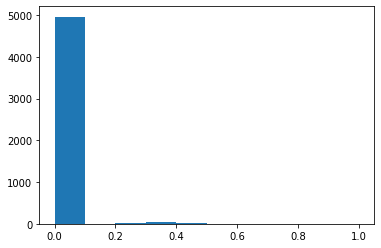

In [52]:
plt.hist(df['dividend amount'])
plt.show()

In [ ]:
# the vast majority of dividends pay less than 0.2, which is to be expected
# this will not be used in the project, but it was interesting to see

In [10]:
df.to_csv('cleaned_data.csv')